# Oracle and Python with oracledb
This is an example of how to query Oracle from Python


## Setup and prerequisites

This is how you can setup an Oracle instance for testing using a docker image for oracle-xe 

**1. run oracle xe on a container from gvenzl dockerhub repo https://github.com/gvenzl/oci-oracle-xe**

`docker run -d --name mydb1 -e ORACLE_PASSWORD=oracle -p 1521:1521 gvenzl/oracle-xe:latest # or use :slim`

wait till the DB is started, check logs at:
`docker logs -f mydb1`

**2. Install the scott/tiger schema with the emp table in PDB xepdb1:**
```
docker exec -it mydb1 /bin/bash
sed -e s=SCOTT/tiger=SCOTT/tiger@xepdb1= -e s/OFF/ON/ /opt/oracle/product/21c/dbhomeXE/rdbms/admin/utlsampl.sql > script.sql
sqlplus system/oracle@xepdb1 <<EOF
@script.sql
EOF
exit
```

**oracledb library:** This uses oracledb to connect to oracle, so no need to install the Oracle client.  
Note: oracledb can also work with the oracle client as cx_Oracle did,
see documentation for details.

## Query Oracle from Python using the oracledb library

In [1]:
# connect to Oracle using oracledb
# !pip install oracledb

import oracledb

db_user = 'scott'
db_connect_string = 'localhost:1521/XEPDB1'
db_pass = 'tiger'

# To avoid storig connection passwords use getpas or db_config
# db_connect_string = 'dbserver:1521/orcl.mydomain.com'
# import getpass
# db_pass = getpass.getpass()

ora_conn = oracledb.connect(user=db_user, password=db_pass, dsn=db_connect_string)

In [2]:
# open a cursor, run a query and fetch the results

cursor = ora_conn.cursor()
cursor.execute('select ename, sal from emp')
res = cursor.fetchall()
cursor.close()

print(res)

[('SMITH', 800.0), ('ALLEN', 1600.0), ('WARD', 1250.0), ('JONES', 2975.0), ('MARTIN', 1250.0), ('BLAKE', 2850.0), ('CLARK', 2450.0), ('SCOTT', 3000.0), ('KING', 5000.0), ('TURNER', 1500.0), ('ADAMS', 1100.0), ('JAMES', 950.0), ('FORD', 3000.0), ('MILLER', 1300.0)]


## oracledb integration with Pandas

In [ ]:
import pandas as pd

# query Oracle using ora_conn and put the result into a pandas Dataframe
df_ora = pd.read_sql('select * from emp', con=ora_conn)    
df_ora

## Use of bind variables

In [ ]:
df_ora = pd.read_sql('select * from emp where empno=:myempno', params={"myempno":7839}, 
                     con=ora_conn) 
df_ora

## Basic visualization

In [6]:
import matplotlib.pyplot as plt 
plt.style.use('seaborn-darkgrid')

In [ ]:
df_ora = pd.read_sql('select ename "Name", sal "Salary" from emp', con=ora_conn)    

ora_conn.close()

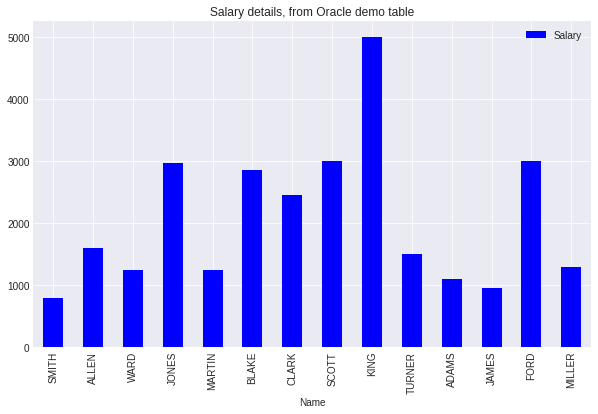

In [8]:
df_ora.plot(x='Name', y='Salary', title='Salary details, from Oracle demo table', 
            figsize=(10, 6), kind='bar', color='blue');